In [4]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Importing the dataset

df = pd.read_csv('df-Clean.csv')
display(df.head(1))

,rated,winner,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num,pca1,pca2
0,1.0,black,0.027778,0.280793,0.257642,0.0,0.0,0.0,1.0,0.0,0.111111,0.195122,-0.568447,-0.138525


## 3. Model Planning:

## a. Run the exploratory data analysis:


## i. Find the statistical summaries.


In [15]:
# Displaying information about the data including columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18593 entries, 0 to 18592
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rated                     18593 non-null  float64
 1   winner                    18593 non-null  object 
 2   increment_code            18593 non-null  float64
 3   white_rating              18593 non-null  float64
 4   black_rating              18593 non-null  float64
 5   victory_status_draw       18593 non-null  float64
 6   victory_status_mate       18593 non-null  float64
 7   victory_status_outoftime  18593 non-null  float64
 8   victory_status_resign     18593 non-null  float64
 9   moves_num                 18593 non-null  float64
 10  opening_num               18593 non-null  float64
 11  midMoves_num              18593 non-null  float64
 12  pca1                      18593 non-null  float64
 13  pca2                      18593 non-null  float64
dtypes: flo

In [7]:
# Displaying a statistical summary of the data
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [11]:
# Previewing the number of unique valuse in the dataset columns 

for col in df.columns:
    print(f"{col} length: {len(df[col].unique())}")

rated length: 2
winner length: 3
increment_code length: 33
white_rating length: 1476
black_rating length: 1485
victory_status_draw length: 2
victory_status_mate length: 2
victory_status_outoftime length: 2
victory_status_resign length: 2
moves_num length: 64
opening_num length: 24
last_moves_num length: 1
midMoves_num length: 79
pca1 length: 17731
pca2 length: 17731


## ii. Make univariate graphs (i.e., graphs based on single variable).


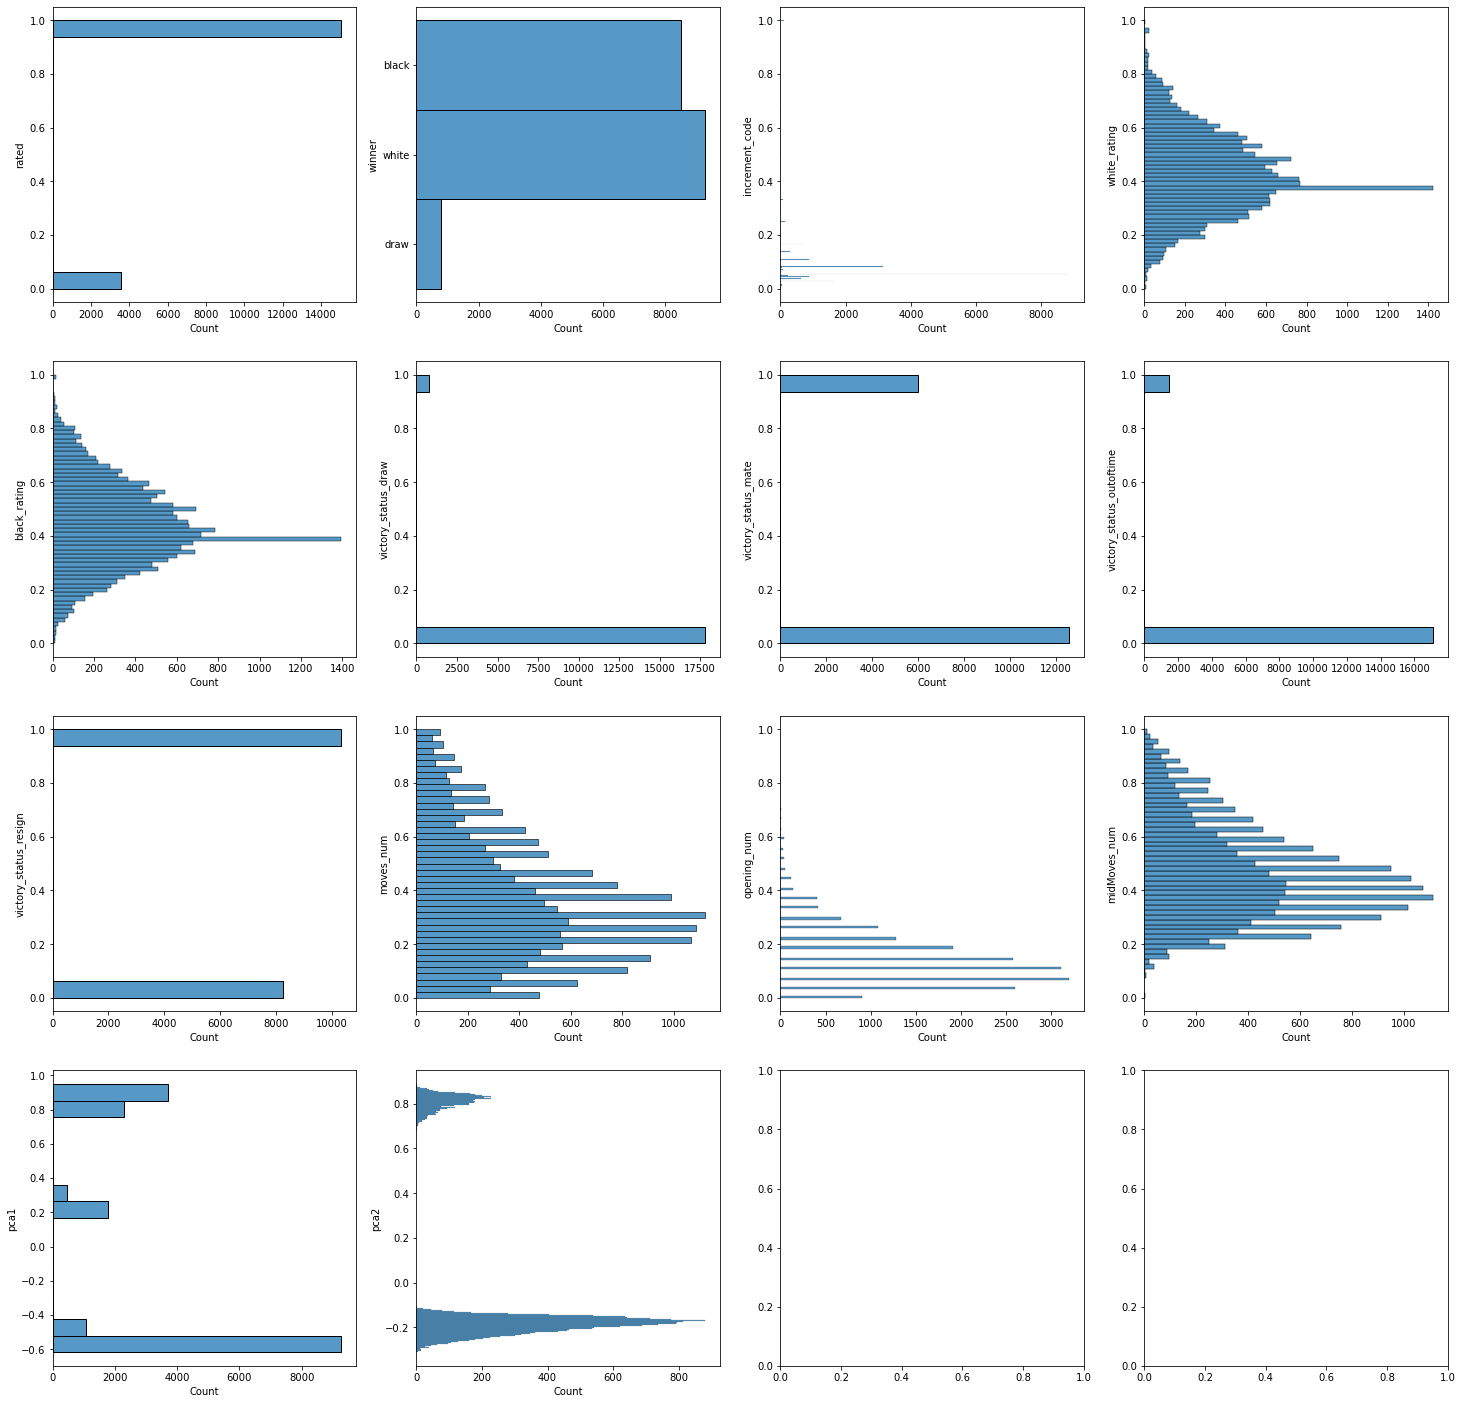

In [16]:
# Plot the Count PLot for the entire DataFrame
nCols=4   # The number of columns that you want
nRows=len(df.columns)//nCols+1   # The number of correspomding rows 

## to avoid rotating labels:
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for ind,col in enumerate(df.columns):
    sns.histplot(y=col,data=df,ax=axes.flatten()[ind])
plt.show()

We notice that the white and black rating are normally distibuted, and the number of moves is a little bit skewed to the right

## iii. Prepare bivariate plots (i.e., plots based on two variables).

<Figure size 1800x1800 with 0 Axes>

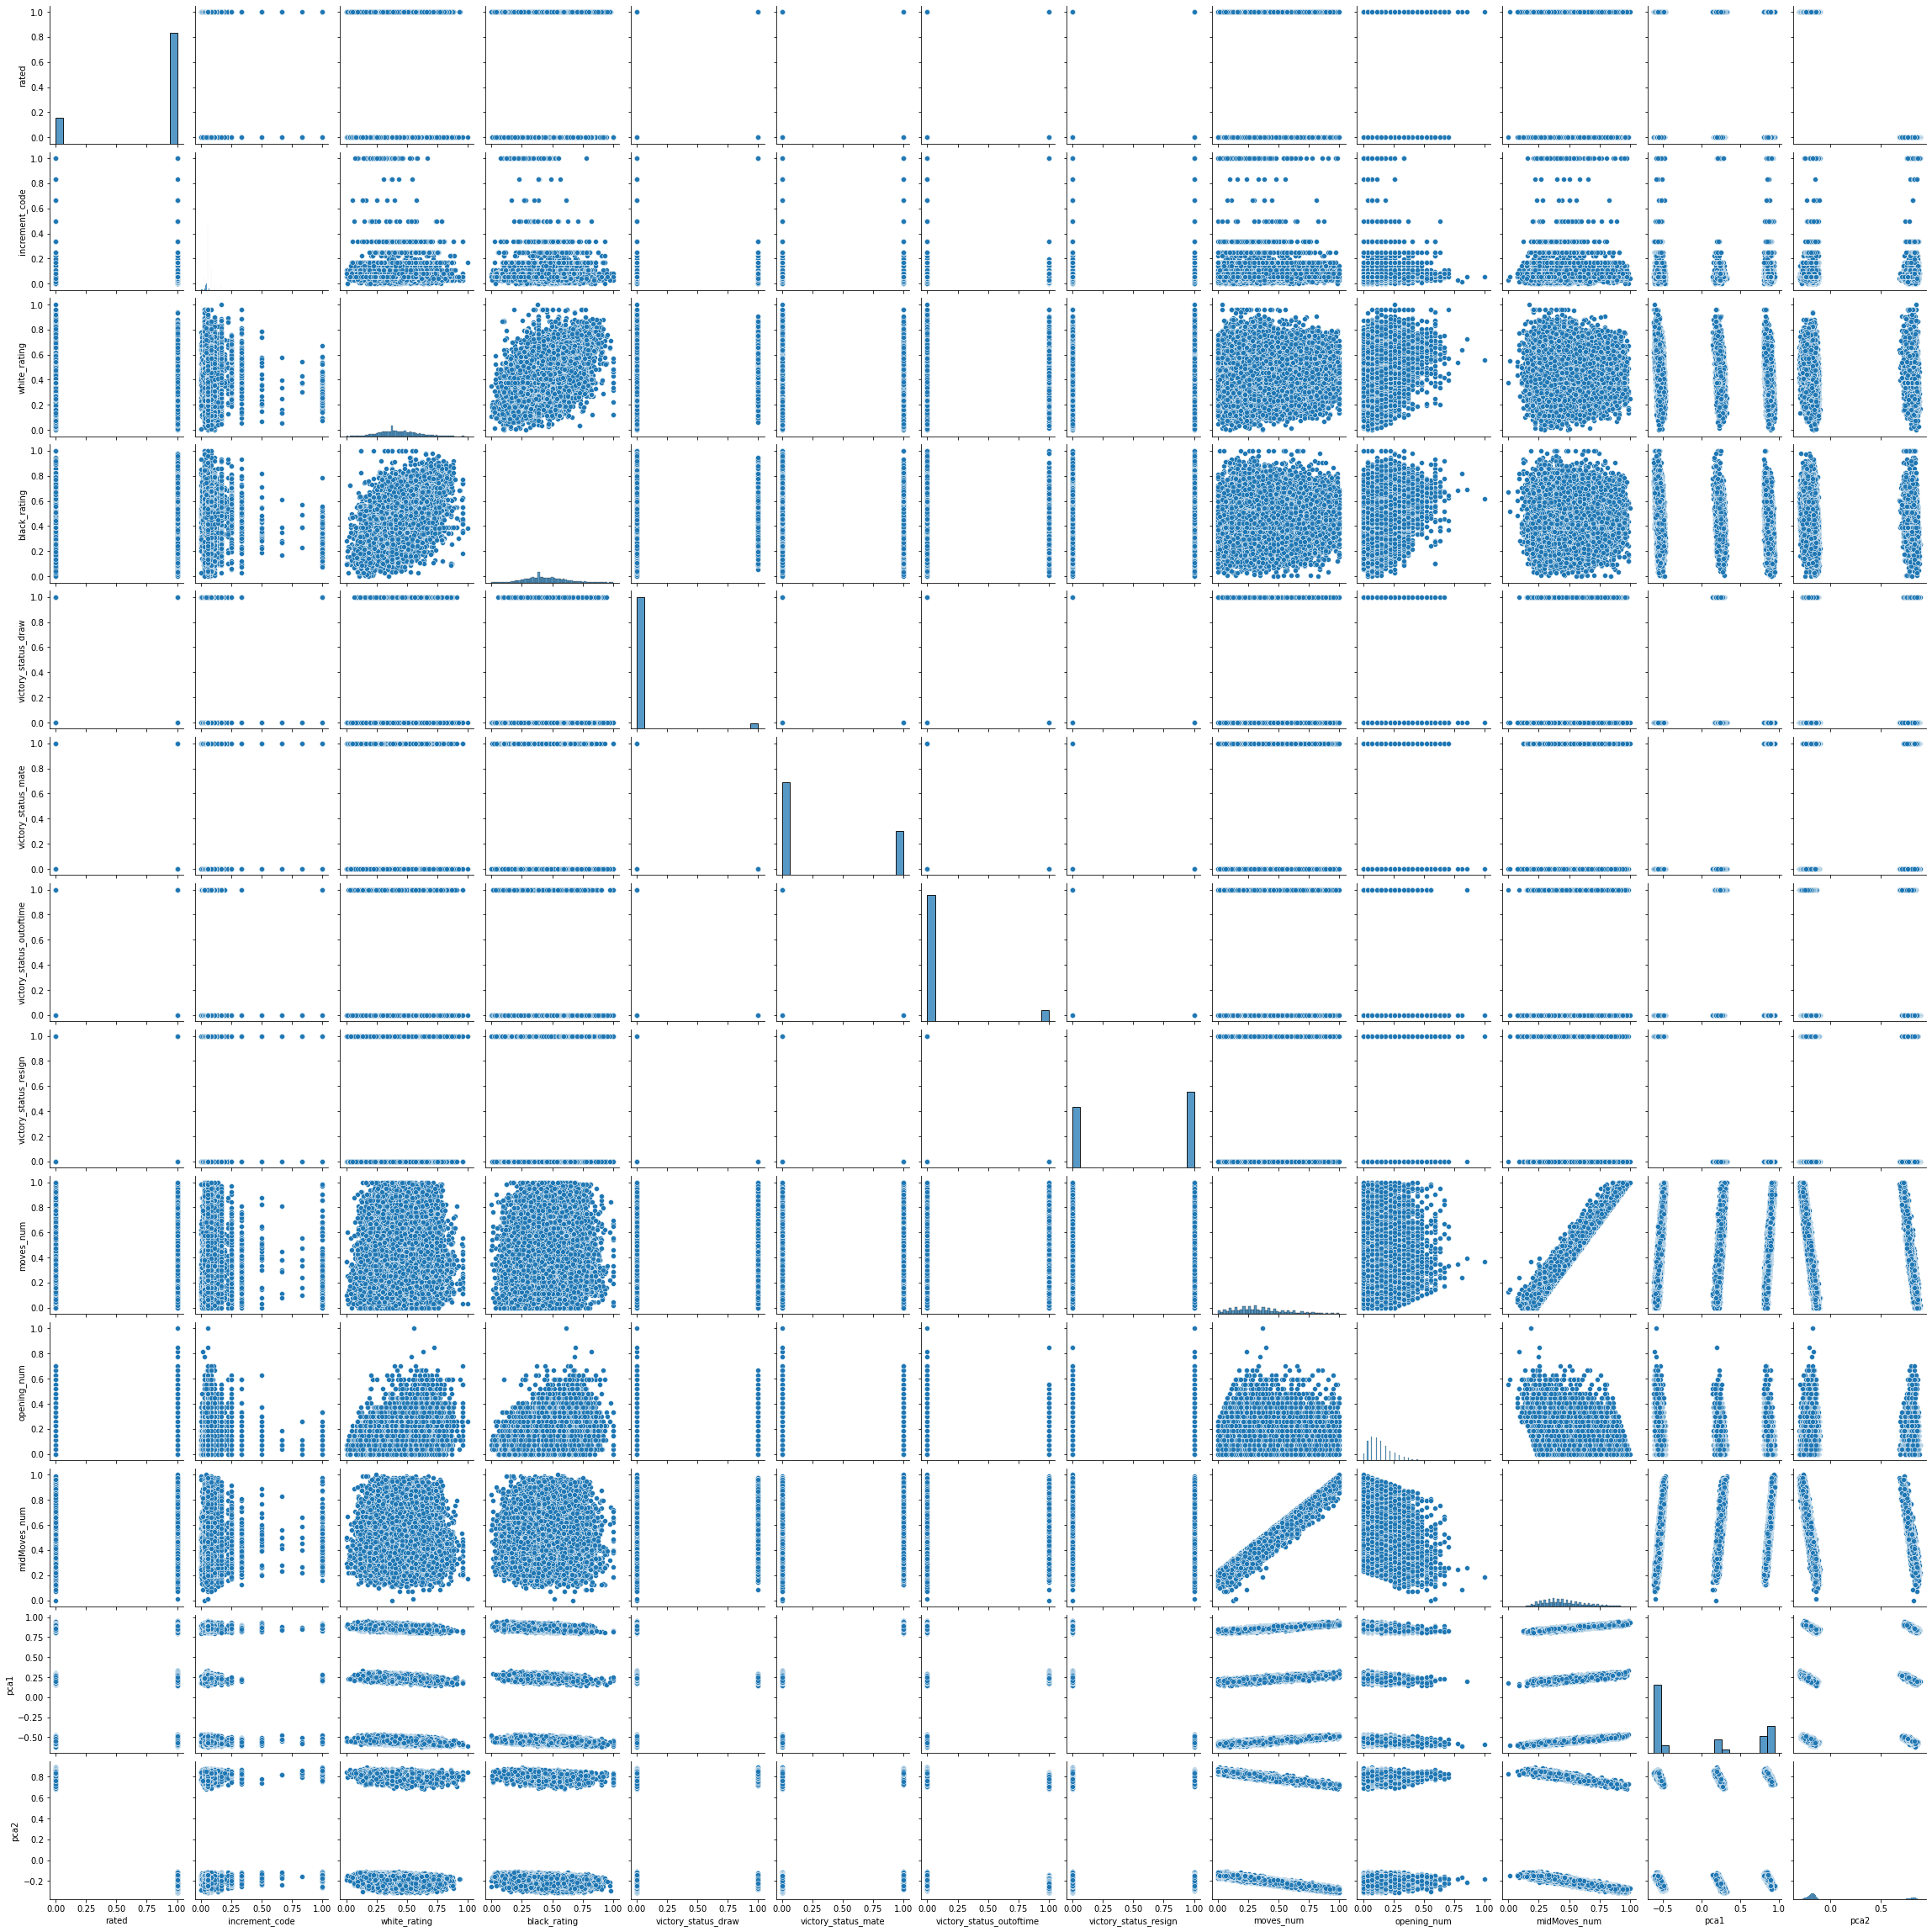

In [18]:
# Plotting a scatter plot between all numaric columns
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(25,25))
# Create a pairplot with seaborn
sns.pairplot(df[numeric_cols])

# Show the plot
plt.show()


We notice that when it comes PCA 1&2 several columns cluster itself in three groups

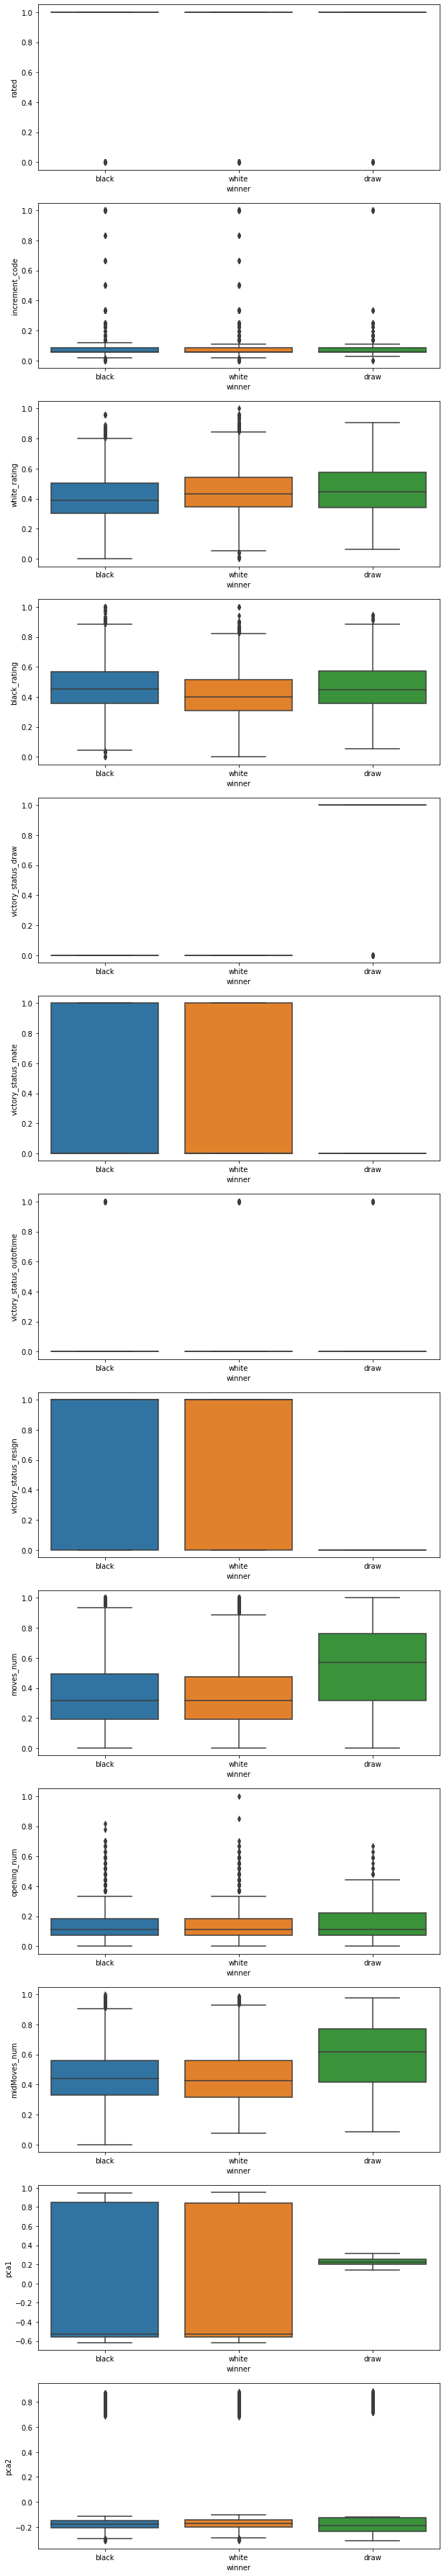

In [21]:
# Select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64']).columns

# Create a figure to hold the subplots
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 5*len(numeric_cols)))

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x='winner', y=col, data=df, ax=axes[i])

# Show the plot
plt.show()

We notice that games where either white or black win are very similar in number of moves and midMoves, but when it comes to draw games they are much higher.

_______________________________________________________________________________________________________________________________________

Line plots are useful for visualizing changes in data over time or for showing trends. However, our cleaned dataset does not seem to have any columns that represent time or a sequence of events (it should have but we delete the time column). Therefore, it is not be suitable for plotting line plots.

## iv. Portray advanced graphs (i.e., graphs based on more than two variables).


The pair plot shows scatter plots for pairs of numerical variables. There appears to be a positive correlation between 'white_rating' and 'black_rating', suggesting that higher-rated players tend to face opponents with similar ratings. Additionally, 'moves_num' seems to have a positive relationship with both 'white_rating' and 'black_rating', suggesting that longer games involve players with higher ratings.

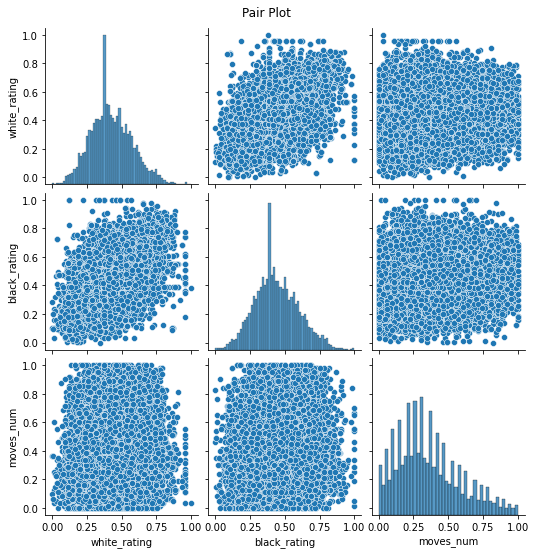

In [23]:
# Pair Plot
sns.pairplot(df[['white_rating', 'black_rating', 'moves_num']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

The box plot of ratings illustrates the distribution of player ratings. It shows that the median rating for both white and black players is around 1900-2000, with some outliers present in both categories.

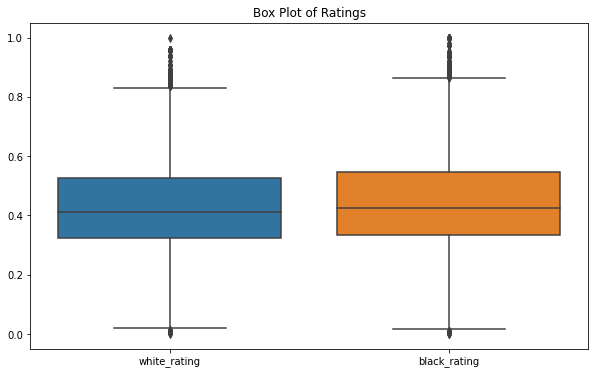

In [24]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['white_rating', 'black_rating']])
plt.title('Box Plot of Ratings')
plt.show()

The scatter plot of player ratings reveals how ratings of white and black players are distributed across winners and losers. It suggests that higher-rated white players tend to win more often, while higher-rated black players also have a good chance of winning.

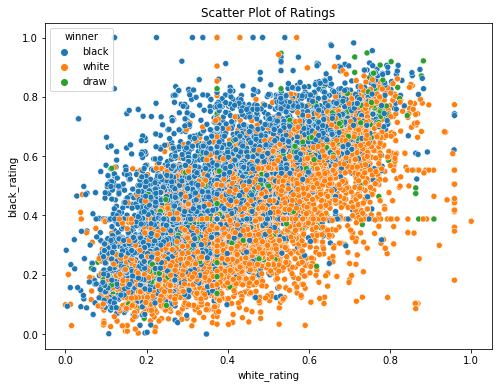

In [25]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='white_rating', y='black_rating', hue='winner')
plt.title('Scatter Plot of Ratings')
plt.show()


Regression Plot of Moves vs. White Rating:

The regression plot demonstrates the relationship between 'moves_num' and 'white_rating'. It suggests a slight positive correlation, implying that games with more moves often involve players with higher white ratings.

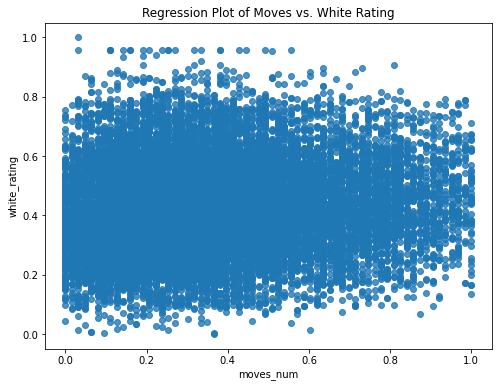

In [26]:

# Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='moves_num', y='white_rating')
plt.title('Regression Plot of Moves vs. White Rating')
plt.show()


The histogram of 'opening_num' indicates the frequency distribution of different opening numbers. It shows that the majority of games have opening numbers around 5 to 10, with a decline in frequency as the opening number deviates from this range.

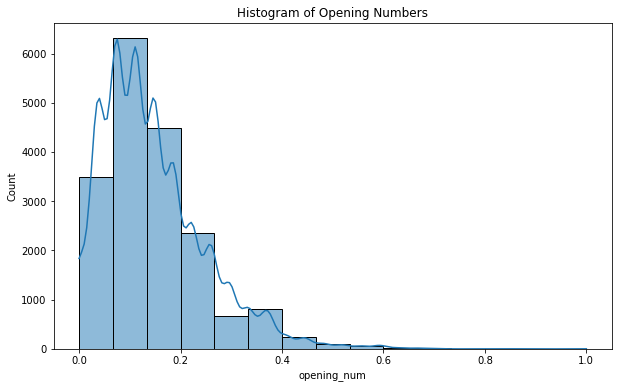

In [27]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='opening_num', bins=15, kde=True)
plt.title('Histogram of Opening Numbers')
plt.show()

The Countplot for winner counts demonstrates that the white wins more games than black

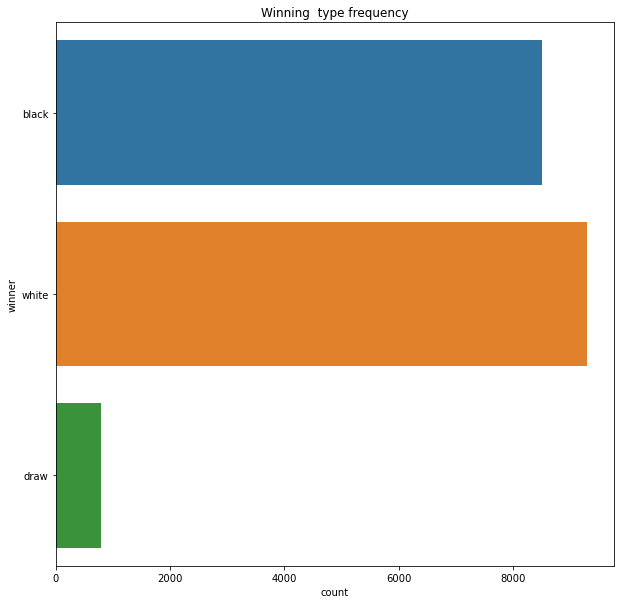

In [28]:

plt.figure(figsize=(10,10))
ax = sns.countplot(y="winner",data=df)
plt.title('Winning  type frequency')
plt.show()

ViolinPlot for winner VS. moves_num

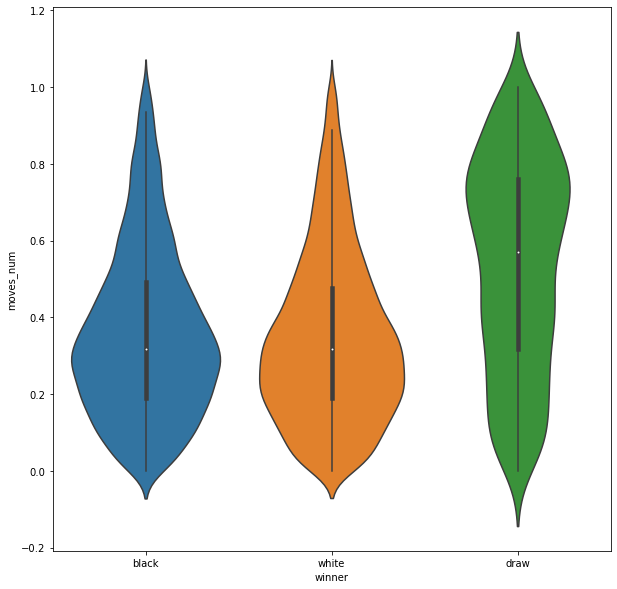

In [30]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x='winner',y='moves_num',data=df)
plt.show()

Plotting heatmap to preview the relations between varibles

In [32]:
corr = df.select_dtypes(exclude='object').corr(method= "pearson")
display(corr.style.background_gradient(cmap= 'coolwarm'))

,rated,increment_code,white_rating,black_rating,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,midMoves_num,pca1,pca2
rated,1.000000,-0.104057,0.006974,0.032499,-0.030698,0.006686,0.005126,0.003250,0.074230,-0.005791,0.074283,0.005726,-0.996031
increment_code,-0.104057,1.000000,-0.054867,-0.058990,0.036614,-0.004839,-0.035412,0.009140,-0.019623,-0.013681,-0.016579,-0.007800,0.110979
white_rating,0.006974,-0.054867,1.000000,0.638114,0.046243,-0.176880,0.008787,0.143063,0.092691,0.275904,0.037951,-0.180313,-0.026020
black_rating,0.032499,-0.058990,0.638114,1.000000,0.035491,-0.171997,0.015619,0.139066,0.114907,0.248997,0.064745,-0.174859,-0.055160
victory_status_draw,-0.030698,0.036614,0.046243,0.035491,1.000000,-0.143745,-0.061272,-0.233126,0.150768,0.019672,0.144173,0.072881,0.022747
victory_status_mate,0.006686,-0.004839,-0.176880,-0.171997,-0.143745,1.000000,-0.203041,-0.772524,0.066317,-0.091888,0.082960,0.921342,0.013347
victory_status_outoftime,0.005126,-0.035412,0.008787,0.015619,-0.061272,-0.203041,1.000000,-0.329292,0.127797,-0.011915,0.127604,0.112265,-0.036177
victory_status_resign,0.003250,0.009140,0.143063,0.139066,-0.233126,-0.772524,-0.329292,1.000000,-0.192617,0.085049,-0.205522,-0.957375,-0.001983
moves_num,0.074230,-0.019623,0.092691,0.114907,0.150768,0.066317,0.127797,-0.192617,1.000000,0.003867,0.981086,0.178954,-0.156265
opening_num,-0.005791,-0.013681,0.275904,0.248997,0.019672,-0.091888,-0.011915,0.085049,0.003867,1.000000,-0.189305,-0.103174,0.006940


## v. Assess the relationship between variables.


* Based on the knowledge we gained from the analysis above, we can reach several conclusions regarding relationships between the featrues in our dataset: 

    * It's possible that longer games ('turns') might indicate a more strategic and thoughtful approach, potentially            
    influencing the outcome.

    * Higher player ratings could suggest a stronger player, leading to a higher chance of winning.
    Certain 'victory_status' categories might correlate with different playing styles, affecting the outcome.

    * Victory status could reflect different playing styles; aggressive players might aim for 'mate' while defensive players might settle for a 'draw'.

    * Specific openings might catch opponents off guard, providing an advantage.

    * factors like 'turns', player ratings, victory status, and opening moves could potentially have an impact on the chance to win in a chess game. However, further statistical analysis or machine learning modeling would be needed to establish more       robust relationships.

    * The reccords indicate that the white player wins slightly more than the black, even though there is no consistent factor or cause for this conclusion.


## b. Summarise your findings. 


In summary, considering the graphs and the advanced graphs plotted above, we see that all varible give different informations and from the heatmap we see that all varibles have no relationship between each which prove our previous point. 

## Model ,algorthim and technique planning:

Considering conclusions and information about the data and the dataset in general, it very suitable to be used in Classifaction or in  Clutering model, even in Reinforcement or Deep learning model which are out of the scoop of our course.

Classification techniques:
- Decision Tree Classifier
- Random Forest
- GaussianNB
- XGboost

Clutering techniques:
- KMeans
- AgglomerativeClustering